In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import datetime as dt
import dateutil

In [2]:
# test api starting at the year 2000
test_url='https://www.quandl.com/api/v3/datasets/ZILLOW/Z95670_ZHVISF?start_date=2017-01-01&api_key=sPG_jsHhtuegYcT7TNWz'
response=requests.get(test_url).json()

In [3]:
# grabbing the data from the response
data=response['dataset']['data']
# data

In [4]:
# mapping the data to a list of lists since sklearn requires a 2D array
def pull_price(n):
    return [n[1]]
# date must be converted to ordinal since its a numeric value which regression requires
def pull_dates(n):
    return [dt.datetime.strptime(n[0], '%Y-%m-%d').toordinal()]
dates=list(map(pull_dates,data))
prices=list(map(pull_price,data))

In [5]:
#formatting the data to a numpy array 
y=np.array(prices)
# prices

In [11]:
# grabbing the latest date to be able to predict the next 12 months
now=dt.datetime.now()
# utility for adding months to a datetime object
a_month = dateutil.relativedelta.relativedelta(months=1)
# making 2 lists, one of the dates as strings, one as ordinals
next_year_ord=[]
next_year_strings=[]
temp=now
for i in range(12):
    temp=temp+a_month
    next_year_ord.append([temp.toordinal()])
    next_year_strings.append(temp.strftime('%Y-%m-%d'))
next_year_ord

[[737798],
 [737829],
 [737857],
 [737888],
 [737918],
 [737949],
 [737979],
 [738010],
 [738041],
 [738071],
 [738102],
 [738132]]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(dates, y, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5865074239.254028
R-squared (R2 ): 0.056277448706243405


In [173]:
model.score(X_test, y_test)

0.05627744870624341

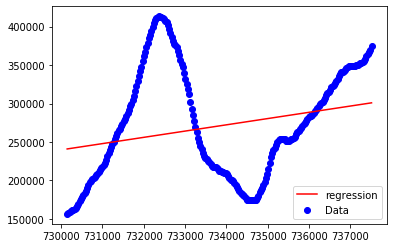

In [174]:
plt.scatter(dates,prices,label='Data',color='blue')
plt.plot(dates,model.predict(dates),label='regression',color='red')
plt.legend(loc='lower right')

In [175]:
# predicting the next year after the latest date
predictions=model.predict(next_year_ord)
predictions

array([[301192.68044904],
       [301436.8350984 ],
       [301689.12823608],
       [301933.28288545],
       [302185.57602313],
       [302437.86916081],
       [302682.02381017],
       [302934.31694785],
       [303178.47159722],
       [303430.7647349 ],
       [303666.78089595],
       [303894.65856869]])

In [176]:
to_return={}
for i in range(len(predictions)):
    to_return[next_year_strings[i]]=predictions[i][0]
to_return

{'2020-04-30': 301192.68044903874,
 '2020-05-30': 301436.83509840444,
 '2020-06-30': 301689.1282360833,
 '2020-07-30': 301933.282885449,
 '2020-08-30': 302185.5760231279,
 '2020-09-30': 302437.8691608058,
 '2020-10-30': 302682.02381017245,
 '2020-11-30': 302934.31694785133,
 '2020-12-30': 303178.471597217,
 '2021-01-30': 303430.7647348959,
 '2021-02-28': 303666.78089594934,
 '2021-03-28': 303894.65856869146}